# Gemini

In [1]:
import pandas as pd
import google.generativeai as genai
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import argparse
import csv
import os

from _0_prepare_tasks import clean_csv
from _1_translate_tasks import translate_csv
from gemini._2_solve_tasks_gemini import solve_tasks
from gemini._3_technical_terms_gemini import extract_technical_terms
from gemini._4_evaluate_solution_gemini import evaluate_solutions
from _5_cross_lang_validation import compare_results

C:\Users\IuG_Lap1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data collection

#### Cleaning exercises list file

In [2]:
input_exercises = "topic_areas.csv"
cleaned_exercises = "topic_areas_cleaned.csv"

clean_csv(input_exercises, cleaned_exercises)

print(f"Cleaned exercises saved to {cleaned_exercises}")

Cleaned exercises saved to topic_areas_cleaned.csv


### Translate exercises to German and Arabic

In [3]:
translated_exercises_de = "topic_areas_cleaned_de.csv"
translated_exercises_ar = "topic_areas_cleaned_ar.csv"

**German translation**

In [4]:
translate_csv(cleaned_exercises, translated_exercises_de, target_language="German")
print(f"Translated tasks to German saved to {translated_exercises_de}")

Translating exercises from English to German...
Translation to German complete. CSV file saved as: topic_areas_cleaned_de.csv.
Translated tasks to German saved to topic_areas_cleaned_de.csv


**Arabic translation**

In [5]:
translate_csv(cleaned_exercises, translated_exercises_ar, target_language="Arabic")
print(f"Translated tasks to Arabic saved to {translated_exercises_ar}")

Translating exercises from English to Arabic...
Translation to Arabic complete. CSV file saved as: topic_areas_cleaned_ar.csv.
Translated tasks to Arabic saved to topic_areas_cleaned_ar.csv


## Solving Exercises

In [6]:
solved_exercises_en = "gemini/topic_areas_solutions_en.csv"
solved_exercises_de = "gemini/topic_areas_solutions_de.csv"
solved_exercises_ar = "gemini/topic_areas_solutions_ar.csv"

In [7]:
import importlib
import gemini._2_solve_tasks_gemini

importlib.reload(gemini._2_solve_tasks_gemini)
from gemini._2_solve_tasks_gemini import solve_tasks

English Solutions:

In [6]:
solve_tasks(cleaned_exercises, solved_exercises_en)
print(f"Solved tasks in English saved to {solved_exercises_en}")

df_en = pd.read_csv(solved_exercises_en)
print(df_en.head())

Solving task 51 in English: A recipe requires \(\frac{5}{6}\) cup of sugar but Jerry only has \(\frac{1}{3}\) cup; how much more sugar does he need to gather?
Solving task 52 in English: During a fundraiser Emily read \(\frac{3}{8}\) of a book and later she read another \(\frac{1}{2}\) of the book; what fraction of the book has she read in total?
Solving task 53 in English: A store is having a sale where all items are 15% off; estimate the total cost of buying 3 shirts priced at $25 each and 2 pairs of shoes priced at $40 each after applying the discount.
Solving task 54 in English: A recipe for a smoothie calls for 2.5 cups of milk 1.3 cups of yogurt and 0.75 cups of fruit; round each ingredient amount to the nearest whole number and estimate the total volume needed for the recipe.
Solving task 55 in English: You have $250 saved for tickets to a concert with each ticket costing approximately $67; estimate how many tickets you can buy and how much money you will have left over.
Solving

German Solutions:

In [7]:
solve_tasks(translated_exercises_de, solved_exercises_de, prompt_prefix='Erkläre mir wie ich diese Aufgaben lösen kann')
print(f"Solved tasks in German saved to {solved_exercises_de}")

df_de = pd.read_csv(solved_exercises_de)
print(df_de.head())

Solving task 51 in German: Ein Rezept benötigt \(\frac{5}{6}\) Tasse Zucker, aber Jerry hat nur \(\frac{1}{3}\) Tasse; wie viel mehr Zucker muss er sammeln?
Solving task 52 in German: Während einer Spendensammlung las Emily \(\frac{3}{8}\) eines Buches und später las sie noch \(\frac{1}{2}\) des Buches; welchen Bruchteil des Buches hat sie insgesamt gelesen?
Solving task 53 in German: Ein Geschäft hat einen Verkauf, bei dem alle Artikel 15 % Rabatt haben; schätzen Sie die Gesamtkosten für den Kauf von 3 Hemden, die jeweils 25 $ kosten, und 2 Paar Schuhen, die jeweils 40 $ kosten, nach Anwendung des Rabatts.
Solving task 54 in German: Ein Rezept für einen Smoothie benötigt 2,5 Tassen Milch, 1,3 Tassen Joghurt und 0,75 Tassen Obst; runde die Menge jedes Inhaltsstoffs auf die nächste ganze Zahl und schätze das gesamte benötigte Volumen für das Rezept.
Solving task 55 in German: Sie haben 250 $ für Tickets zu einem Konzert gespart, wobei jedes Ticket ungefähr 67 $ kostet. Schätzen Sie, wie

Arabic Solutions:

In [8]:
solve_tasks(translated_exercises_ar, solved_exercises_ar, prompt_prefix='اشرحلي خطوات حل هذه المسألة')
print(f"Solved tasks in Arabic saved to {solved_exercises_ar}")

df_ar = pd.read_csv(solved_exercises_ar)
print(df_ar.head())

Solving task 51 in Arabic: وصف التمرين هو: تحتاج الوصفة إلى \(\frac{5}{6}\) كوب من السكر، لكن جيري لديه فقط \(\frac{1}{3}\) كوب؛ كم كوبًا إضافيًا من السكر يحتاج لجمعه؟
Solving task 52 in Arabic: خلال حملة جمع التبرعات، قرأت إميلي \(\frac{3}{8}\) من كتاب، وفي وقت لاحق قرأت \(\frac{1}{2}\) من الكتاب أيضًا؛ فما هي الكسور الإجمالية من الكتاب التي قرأتها؟
Solving task 53 in Arabic: متجر يقدم عرضاً حيث جميع العناصر عليها خصم بنسبة 15٪؛ قدر التكلفة الإجمالية لشراء 3 قمصان بسعر 25 دولار لكل منها و 2 زوج من الأحذية بسعر 40 دولار لكل منها بعد تطبيق الخصم.
Solving task 54 in Arabic: وصفة لعصير سموذي تتطلب 2.5 كوب من الحليب، 1.3 كوب من الزبادي و0.75 كوب من الفاكهة; قم بتقريب كمية كل مكون إلى أقرب رقم صحيح وتقدير الحجم الكلي المطلوب للوصفة.
Solving task 55 in Arabic: لديك 250 دولارًا مدخرًا لشراء تذاكر لحفل موسيقي، حيث تكلفة كل تذكرة حوالي 67 دولارًا؛ قم بتقدير عدد التذاكر التي يمكنك شراؤها ومقدار المال الذي سيبقى معك.
Solving task 56 in Arabic: مخبز يبيع الكعك بسعر 2.50 دولار لكل واحدة ويقدم خصمًا

## Pairwise Evaluation

In [8]:
solution_files = {
    "en": solved_exercises_en,
    "de": solved_exercises_de,
    "ar": solved_exercises_ar,
}

technical_terms_files = {
    "en": "technical_terms_en.csv",
    "de": "technical_terms_de.csv",
    "ar": "technical_terms_ar.csv",
}

In [13]:
import importlib
import _7_pairwise_evaluation

importlib.reload(_7_pairwise_evaluation)
from _7_pairwise_evaluation import evaluate_explanations

In [14]:
df_results = evaluate_explanations(solution_files, technical_terms_files, current_model='gemini-1.5-flash')

pd.set_option('display.max_colwidth', None)  # Ensure long explanations are visible
print(df_results.head())

Evaluating exercise 0... ✅ Saved exercise 0 to CSV.
✅ Saved exercise 1 to CSV.
✅ Saved exercise 2 to CSV.
✅ Saved exercise 3 to CSV.
✅ Saved exercise 4 to CSV.
✅ Saved exercise 5 to CSV.
✅ Saved exercise 6 to CSV.
✅ Saved exercise 7 to CSV.
✅ Saved exercise 8 to CSV.
✅ Saved exercise 9 to CSV.
✅ Saved exercise 10 to CSV.
✅ Saved exercise 11 to CSV.
✅ Saved exercise 12 to CSV.
✅ Saved exercise 13 to CSV.
✅ Saved exercise 14 to CSV.
✅ Saved exercise 15 to CSV.
✅ Saved exercise 16 to CSV.
✅ Saved exercise 17 to CSV.
✅ Saved exercise 18 to CSV.
✅ Saved exercise 19 to CSV.
✅ Saved exercise 20 to CSV.
✅ Saved exercise 21 to CSV.
✅ Saved exercise 22 to CSV.
✅ Saved exercise 23 to CSV.
✅ Saved exercise 24 to CSV.
✅ Saved exercise 25 to CSV.
✅ Saved exercise 26 to CSV.
✅ Saved exercise 27 to CSV.
✅ Saved exercise 28 to CSV.
✅ Saved exercise 29 to CSV.
✅ Saved exercise 30 to CSV.
✅ Saved exercise 31 to CSV.
✅ Saved exercise 32 to CSV.
✅ Saved exercise 33 to CSV.
✅ Saved exercise 34 to CSV.
✅ Sav

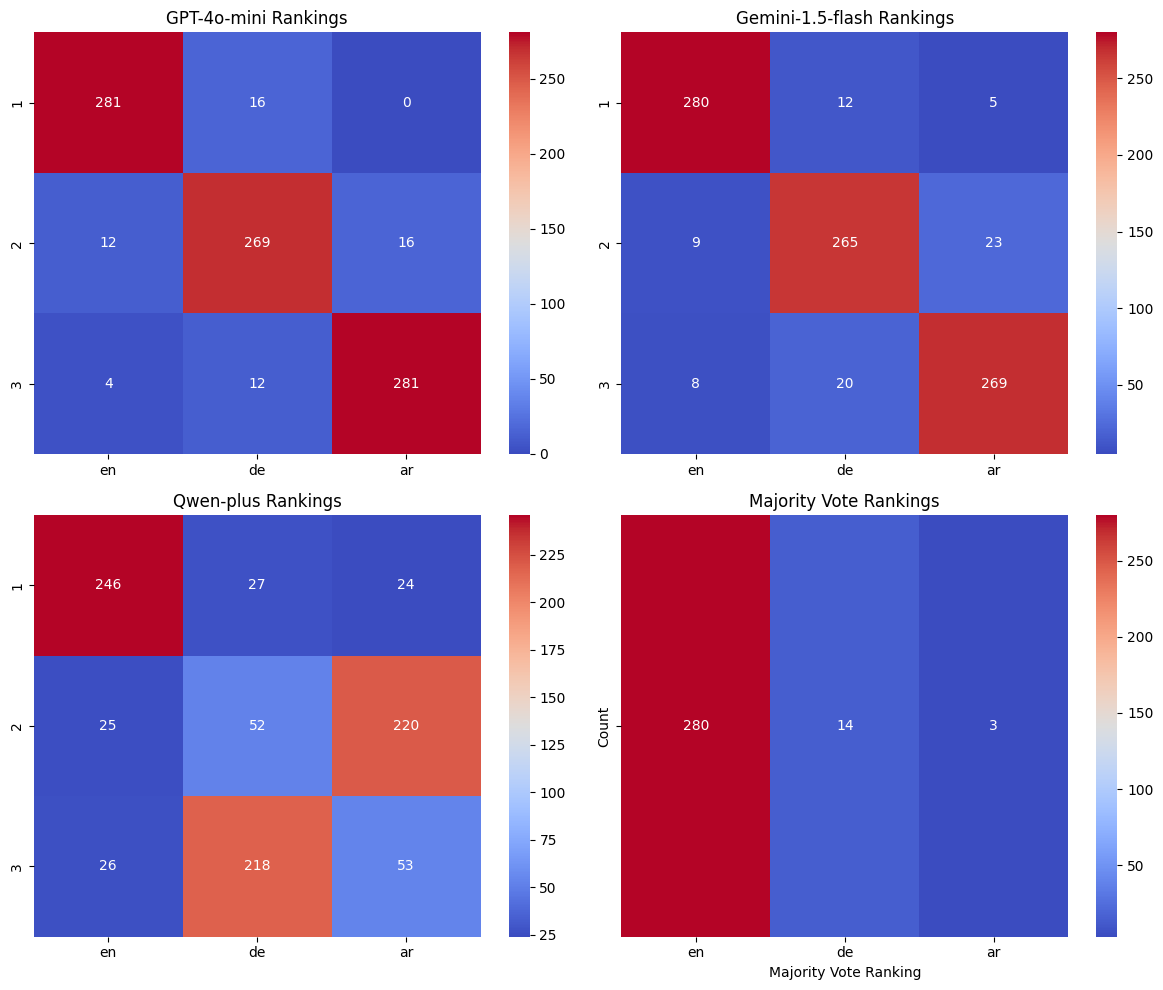

In [33]:
import ast
import re

expected_languages = list(solution_files.keys())  # ['en', 'de', 'ar']

def parse_ranking(ranking_str):
    """
    Converts ranking strings from '[en: 1, de: 2, ar: 3]' into a proper Python dictionary.
    """
    try:
        # Ensure it's a string before processing
        if not isinstance(ranking_str, str):
            return {}

        formatted_str = ranking_str.replace("Lang1", "en").replace("Lang2", "de").replace("Lang3", "ar") 

        #  Convert to dictionary
        ranking_dict = eval(formatted_str)  # Using eval carefully after regex formatting

        # Ensure it returns a dictionary
        if isinstance(ranking_dict, dict):
            return ranking_dict
        else:
            return {}

    except Exception as e:
        print(f"Error parsing ranking: {ranking_str} -> {e}")
        return {}

# Load the evaluation results
df_results = pd.read_csv('gemini/judge_pairwise_evaluation.csv')

# Apply parsing function to rankings
df_results["gpt-4o-mini Ranking"] = df_results["gpt-4o-mini Ranking"].apply(parse_ranking)
df_results["gemini-1.5-flash Ranking"] = df_results["gemini-1.5-flash Ranking"].apply(parse_ranking)
df_results["qwen-plus Ranking"] = df_results["qwen-plus Ranking"].apply(parse_ranking)
# df_results["Majority Vote Ranking"] = df_results["Majority Vote Ranking"].apply(parse_ranking)

# Convert ranking dictionaries into dataframes
gpt_rank_df = pd.DataFrame(df_results["gpt-4o-mini Ranking"].to_list())
gemini_rank_df = pd.DataFrame(df_results["gemini-1.5-flash Ranking"].to_list())
qwen_rank_df = pd.DataFrame(df_results["qwen-plus Ranking"].to_list())
majority_rank_df = pd.DataFrame(df_results["Majority Vote Ranking"].to_list())

# Rename columns based on the expected language keys
gpt_rank_df.columns = expected_languages
gemini_rank_df.columns = expected_languages
qwen_rank_df.columns = expected_languages
# majority_rank_df.columns = expected_languages

# Count how often each language gets each ranking position
gpt_ranking_counts = gpt_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
gemini_ranking_counts = gemini_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
qwen_ranking_counts = qwen_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
# majority_ranking_counts = majority_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)

majority_ranking_counts = df_results["Majority Vote Ranking"].value_counts().to_frame()
majority_ranking_counts.columns = ["Count"]

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmaps for individual LLM rankings
sns.heatmap(gpt_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("GPT-4o-mini Rankings")

sns.heatmap(gemini_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Gemini-1.5-flash Rankings")

sns.heatmap(qwen_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Qwen-plus Rankings")

# Heatmap for Majority Vote Ranking
sns.heatmap(majority_ranking_counts.T, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Majority Vote Rankings")

# Adjust layout
plt.tight_layout()
plt.show()

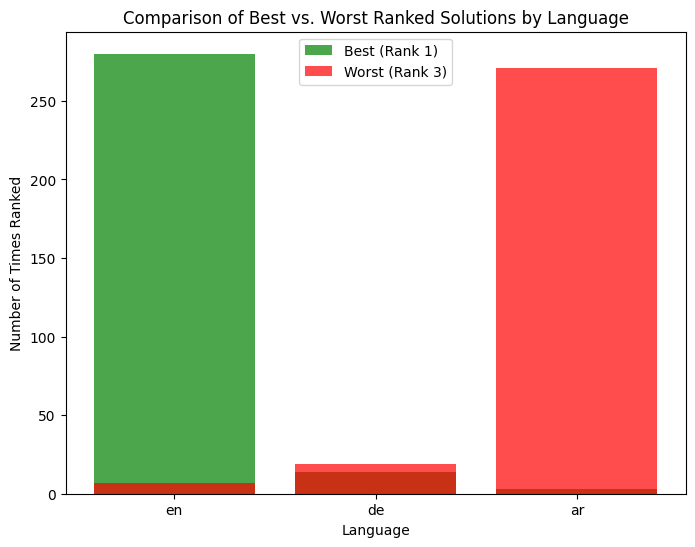

In [31]:
import matplotlib.pyplot as plt

# Count occurrences of each language in best and worst rankings
best_counts = df_results["Best Explanation"].value_counts()
worst_counts = df_results["Worst Explanation"].value_counts()

# Ensure all languages are included (even if they have 0 counts)
languages = list(solution_files.keys())  # ['en', 'de', 'ar']
best_counts = best_counts.reindex(languages, fill_value=0)
worst_counts = worst_counts.reindex(languages, fill_value=0)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(best_counts.index, best_counts.values, label="Best (Rank 1)", color="green", alpha=0.7)
plt.bar(worst_counts.index, worst_counts.values, label="Worst (Rank 3)", color="red", alpha=0.7)
plt.xlabel("Language")
plt.ylabel("Number of Times Ranked")
plt.title("Comparison of Best vs. Worst Ranked Solutions by Language")
plt.legend()
plt.show()

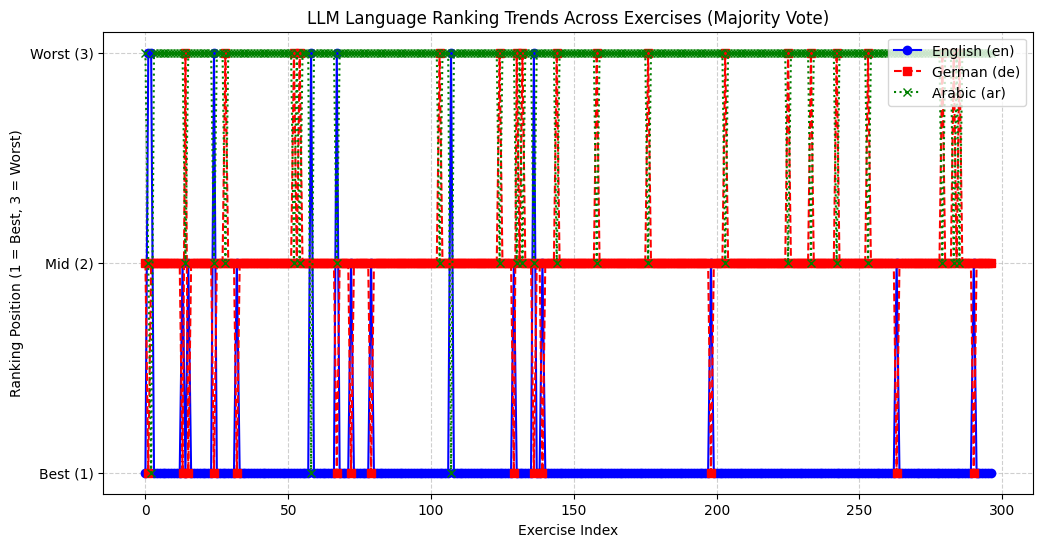

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define models and languages
models = ["gpt-4o-mini", "gemini-1.5-flash", "qwen-plus"]
languages = ["en", "de", "ar"]  # Fixed order for consistency

# Create lists for each language's ranking position across exercises
en_ranking, de_ranking, ar_ranking = [], [], []

# Iterate through all exercises
for _, row in df_results.iterrows():
    majority_best = row["Majority Vote Ranking"]  # The best language from Majority Vote
    if not isinstance(majority_best, str) or majority_best not in languages:
        continue  # Skip if invalid

    # Get the remaining two languages
    remaining_languages = [lang for lang in languages if lang != majority_best]
    if len(remaining_languages) != 2:
        continue  # Skip if incomplete data

    # Collect worst ranking votes across models
    worst_votes = Counter()
    for model in models:
        ranking_value = row.get(f"{model} Ranking", "")

        # Ensure ranking_value is a dictionary (convert string if needed)
        if isinstance(ranking_value, str) and ranking_value.strip().startswith("{"):
            try:
                ranking_dict = eval(ranking_value)  # Convert string to dictionary
            except:
                continue
        elif isinstance(ranking_value, dict):
            ranking_dict = ranking_value
        else:
            continue  # Skip if the value is neither dict nor valid string

        # Ensure ranking_dict contains all three languages
        if len(ranking_dict) < 3:
            continue  # Skip if incomplete ranking

        # Sort by ranking position (1 = best, 3 = worst)
        sorted_langs = sorted(ranking_dict, key=ranking_dict.get)

        if sorted_langs:
            worst_votes[sorted_langs[-1]] += 1  # Worst gets more votes

    # Determine worst language via majority vote
    worst_language = worst_votes.most_common(1)[0][0] if worst_votes else remaining_languages[0]

    # The last remaining language is the mid-ranked one
    mid_language = [lang for lang in remaining_languages if lang != worst_language][0]

    # Assign rankings to fixed language positions
    rank_mapping = {majority_best: 1, mid_language: 2, worst_language: 3}
    en_ranking.append(rank_mapping["en"])
    de_ranking.append(rank_mapping["de"])
    ar_ranking.append(rank_mapping["ar"])

# Plot the ranking trends with fixed colors
plt.figure(figsize=(12, 6))

plt.plot(range(len(en_ranking)), en_ranking, marker="o", linestyle="-", label="English (en)", color="blue")
plt.plot(range(len(de_ranking)), de_ranking, marker="s", linestyle="--", label="German (de)", color="red")
plt.plot(range(len(ar_ranking)), ar_ranking, marker="x", linestyle=":", label="Arabic (ar)", color="green")

plt.xlabel("Exercise Index")
plt.ylabel("Ranking Position (1 = Best, 3 = Worst)")
plt.title("LLM Language Ranking Trends Across Exercises (Majority Vote)")
plt.yticks([1, 2, 3], labels=["Best (1)", "Mid (2)", "Worst (3)"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

## Evaluating Solutions

In [36]:
evaluations_en = "gemini/topic_areas_evaluations_en.csv"
evaluations_de = "gemini/topic_areas_evaluations_de.csv"
evaluations_ar = "gemini/topic_areas_evaluations_ar.csv"

In [56]:
evaluate_solutions(solved_exercises_en, terms_en, evaluations_en)
print(f"Evaluation of solutions in English saved to {evaluations_en}")

Evaluating solution for task 1: Draw 10 stars in the box and color 5 of them blue.
Evaluating solution for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Evaluating solution for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Evaluating solution for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Evaluating solution for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Evaluating solution for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Evaluating solution for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Evaluating solution for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Evaluating solution for task 9: Liam read 45 pages of 

In [57]:
evaluate_solutions(solved_exercises_de, terms_de, evaluations_de)
print(f"Evaluation of solutions in German saved to {evaluations_de}")

Evaluating solution for task 1: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Evaluating solution for task 2: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Evaluating solution for task 3: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Evaluating solution for task 4: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Evaluating solution for task 5: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Evaluating solution for task 6: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Evaluating solution for task 7: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Evaluating solution for task 8: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Ev

In [58]:
evaluate_solutions(solved_exercises_ar, terms_ar, evaluations_ar)
print(f"Evaluation of solutions in Arabic saved to {evaluations_ar}")

Evaluating solution for task 1: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.
Evaluating solution for task 2: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.
Evaluating solution for task 3: اكتب الأرقام من 1 إلى 20 بالترتيب على الأسطر المتاحة.
Evaluating solution for task 4: ارسم خطوطاً لربط الأرقام من 1 إلى 20 بأنماط النقاط المطابقة لها.
Evaluating solution for task 5: قم بدائرة الرقم الذي يحتوي على نفس عدد النقاط الموجودة تحته؛ على سبيل المثال، إذا رأيت 5 نقاط، قم بدائرة الرقم 5.
Evaluating solution for task 6: املأ الفراغات بالرمز الرقمي الصحيح الذي يطابق أنماط النقاط الموضحة في الصفحة.
Evaluating solution for task 7: إيما لديها 24 تفاحة وقد أعطت 13 تفاحة لصديقتها؛ كم عدد التفاح المتبقي لديها؟
Evaluating solution for task 8: مزارع لديه 36 جزرة ويقطف 12 جزرة أخرى؛ كم عدد الجزر التي يمتلكها في المجموع؟
Evaluating solution for task 9: ليام قرأ 45 صفحة من كتابه ثم أنهى 22 صفحة أخرى؛ فكم صفحًة قرأها إجمالًا؟
Evaluating solution for task 10: سارة لديها 8 علب من

## Results Comparisons

In [59]:
files = {
    "en": evaluations_en,
    "de": evaluations_de,
    "ar": evaluations_ar,
}

In [60]:
import importlib
import _5_cross_lang_validation

importlib.reload(_5_cross_lang_validation)
from _5_cross_lang_validation import compare_results

In [61]:
cross_validation_results = compare_results(files, output_dir="gemini/")


=== Language with Highest Average for Each Metric ===

Problem Understanding (Comprehension)         ar
Clarity and Step-by-Step Explanation          ar
Accuracy of Process (Correctness of Steps)    ar
Correctness of Final Answer                   en
Learning Appropriateness                      ar
Generalization                                ar
Technical Terms Explanation                   de
Addressing Common Errors                      ar
Appropriateness Based on Progress Level       ar
Explanation Clarity & Syntax                  ar
dtype: object


In [62]:
comparison_results = pd.read_csv('gemini/comparison_results.csv')
highest_averages = pd.read_csv('gemini/highest_averages.csv')

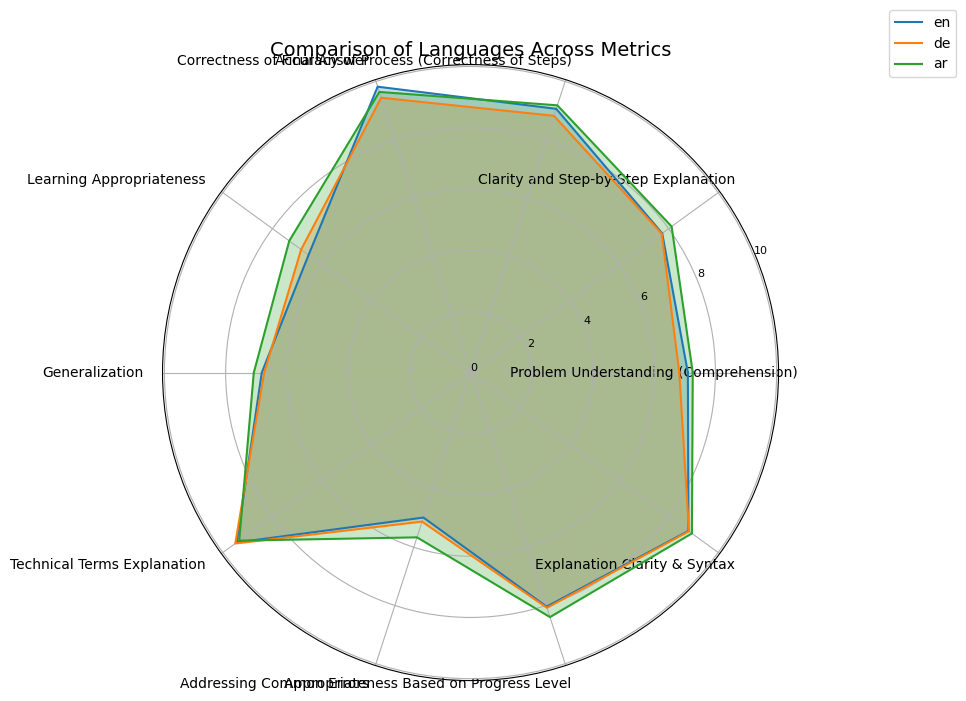

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data from CSV
file_path = "gemini/comparison_results.csv"
df = pd.read_csv(file_path, index_col=0)  # Load CSV, set first column as index (languages)

# Extract languages and metrics dynamically
languages = df.index.tolist()
metrics = df.columns.tolist()

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each language's data
for lang in languages:
    data = df.loc[lang].tolist()  # Extract values for the language
    data += data[:1]  # Close the circle
    ax.plot(angles, data, label=lang)
    ax.fill(angles, data, alpha=0.25)

# Format radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10, rotation=30, ha="right")
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '10'], fontsize=8)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Comparison of Languages Across Metrics', fontsize=14)
plt.show()

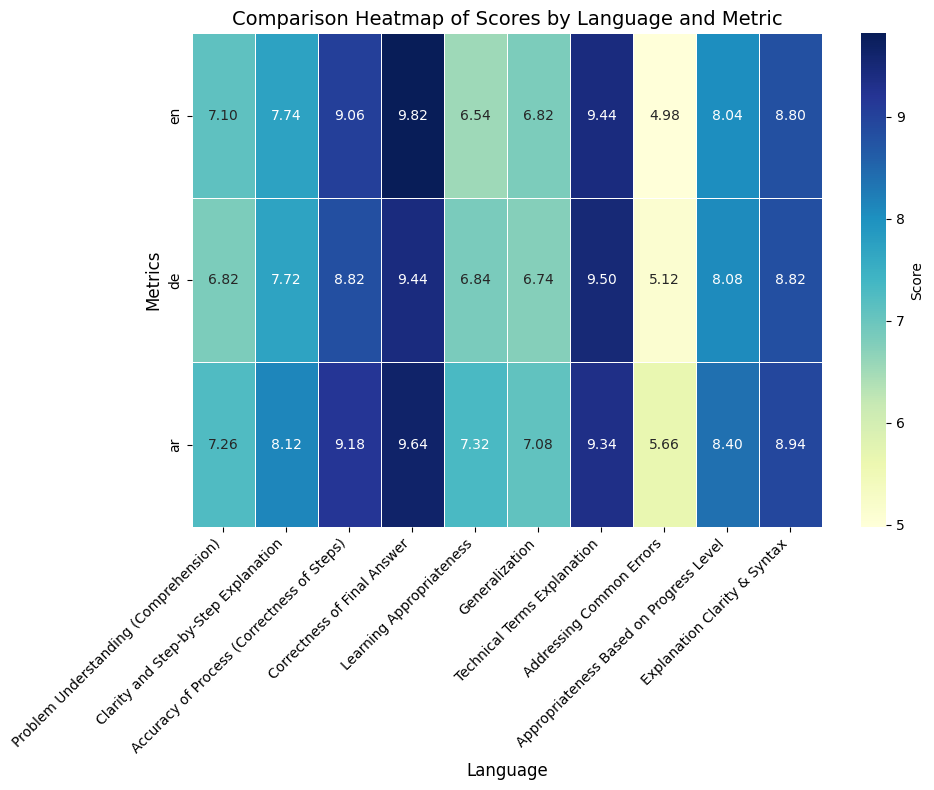

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("gemini/comparison_results.csv")

# Set the index of the DataFrame to the metrics column
data.set_index("Unnamed: 0", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data,
    annot=True,  # Show the values in each cell
    cmap="YlGnBu",  # Color palette
    fmt=".2f",  # Format the numbers to 2 decimal places
    linewidths=0.5,  # Add space between cells
    cbar_kws={'label': 'Score'}  # Label for the color bar
)

# Add labels and title
plt.title("Comparison Heatmap of Scores by Language and Metric", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Metrics", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
import importlib
import _6_find_differently_performing_exercises

importlib.reload(_6_find_differently_performing_exercises)
from _6_find_differently_performing_exercises import find_differently_performing_exercises

result = find_differently_performing_exercises([evaluations_en, evaluations_de, evaluations_ar])

result.to_csv("gemini/most_different_exercises.csv", index=False)

Invalid value: 0


In [66]:
pd.read_csv("gemini/most_different_exercises.csv").head()

,exercise,language_1,language_2,language_3,Total_Difference
0,exercise_39,6.1,8.8,8.1,2.7
1,exercise_27,7.9,5.6,8.3,2.7
2,exercise_6,7.5,5.6,5.3,2.2
3,exercise_29,8.2,6.0,7.7,2.2
4,exercise_18,7.7,5.8,7.8,2.0


In [51]:
def get_exercise_solution(index, solutions_en, solutions_de, solutions_ar, model='gemini-1.5-flash'):
    # Ensure index is within the bounds of the dataframes
    if index < 0 or index > len(solutions_en):
        raise ValueError("Index is out of bounds for the solutions dataframes.")
    
    # Retrieve the exercise solutions from each language file at the given index
    solution_en = solutions_en.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in English
    solution_de = solutions_de.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in German
    solution_ar = solutions_ar.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in Arabic
    
    # Returning the exercise solutions as a dictionary
    return {
        'Exercise': solutions_en.iloc[index-1]['Exercise'],
        'English': solution_en,
        'German': solution_de,
        'Arabic': solution_ar
    }

In [52]:

# Example of usage:
index = 29  # Example index
sols_en = pd.read_csv(solved_exercises_en)
sols_de = pd.read_csv(solved_exercises_de)
sols_ar = pd.read_csv(solved_exercises_ar)
solutions = get_exercise_solution(index, sols_en, sols_de, sols_ar)
print(solutions['Exercise'])
print('---')
print(solutions['English'])
print('---')
print(solutions['German'])
print('---')
print(solutions['Arabic'])

Arrange the following bank account balances from the least to the greatest value: -150.75 200.50 -45.30 and 75.00.
---
To arrange the bank account balances from least to greatest you need to consider the negative and positive values.  Negative numbers are always less than positive numbers.  Among negative numbers the one with the largest absolute value (ignoring the negative sign) is the smallest.

1. **Identify the negative balances:** -150.75 and -45.30

2. **Compare the negative balances:** -150.75 is smaller than -45.30 (because it's further to the left on a number line).

3. **Identify the positive balances:** 200.50 and 75.00

4. **Compare the positive balances:** 75.00 is smaller than 200.50.

Therefore the ordered list from least to greatest is:  **-150.75 -45.30 75.00 200.50**
---
Um die Bankkontostände vom niedrigsten zum höchsten Wert zu ordnen musst du die Vorzeichen berücksichtigen. Negative Beträge sind kleiner als positive Beträge.

1. **Negative Beträge sortieren:**  Zu